In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Convolution2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D,ZeroPadding2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import model_from_json

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

import seaborn as sns
import pickle

from src.graph_performance import graph_MAE, get_ytrue_ypred, plot_average_MAE

### Regression 

In [2]:
imggen = ImageDataGenerator(preprocessing_function=preprocess_input, rescale=1/255.0,validation_split=0.2)

batch_size=32
filepath = '/home/ubuntu/data/AFAD-Full/AFAD'
train_datagen_age = imggen.flow_from_directory(filepath, target_size=(100,100),batch_size=batch_size, 
                                           class_mode = 'sparse',subset='training')
validation_datagen_age = imggen.flow_from_directory(filepath, target_size=(100,100), batch_size=batch_size
                                                , class_mode = 'sparse', subset='validation')

Found 131541 images belonging to 26 classes.
Found 32877 images belonging to 26 classes.


In [2]:
age_model = Sequential()
age_model.add(Convolution2D(filters = 64, kernel_size = (3, 3), 
      padding = 'same',input_shape=(100,100,3), activation = 'relu'))
age_model.add(MaxPooling2D(pool_size= (2, 2)))
age_model.add(Convolution2D(filters = 32, kernel_size = (3, 3), 
                              padding = 'same', activation = 'relu'))
age_model.add(MaxPooling2D(pool_size= (2, 2)))
age_model.add(Dropout(0.5))
age_model.add(Flatten())
age_model.add(Dense(128, activation = 'relu'))
age_model.add(Dense(64, activation = 'relu'))
age_model.add(Dropout(0.5))
age_model.add(Dense(1, activation = 'linear'))

opt = keras.optimizers.Adam(learning_rate=0.0003)
age_model.compile(optimizer=opt, 
                  loss='mean_absolute_error', metrics=['mse'])

age_model.summary()

W0423 03:42:03.606104 140369387616000 deprecation.py:506] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [9]:
checkpoint = ModelCheckpoint('simple_cnn_age.h5', monitor = 'val_loss', 
                             mode = 'min', save_best_only = True, verbose = 1)

earlystopping = EarlyStopping(monitor= 'val_loss', patience = 15, 
                              verbose = 1, restore_best_weights= True)

In [11]:
history_age = age_model.fit(train_datagen_age, batch_size = 64, epochs=50, verbose=2,
                    validation_data=validation_datagen_age,callbacks=[earlystopping, checkpoint])

Epoch 1/50

Epoch 00001: val_loss improved from inf to 4.68867, saving model to age_weights.h5
4111/4111 - 249s - loss: 4.9157 - mean_squared_error: 40.7663 - val_loss: 4.6887 - val_mean_squared_error: 33.8631
Epoch 2/50

Epoch 00002: val_loss improved from 4.68867 to 4.49653, saving model to age_weights.h5
4111/4111 - 146s - loss: 4.6954 - mean_squared_error: 37.6638 - val_loss: 4.4965 - val_mean_squared_error: 35.4691
Epoch 3/50

Epoch 00003: val_loss improved from 4.49653 to 4.41378, saving model to age_weights.h5
4111/4111 - 148s - loss: 4.5970 - mean_squared_error: 36.2220 - val_loss: 4.4138 - val_mean_squared_error: 32.1769
Epoch 4/50

Epoch 00004: val_loss improved from 4.41378 to 4.35788, saving model to age_weights.h5
4111/4111 - 148s - loss: 4.5295 - mean_squared_error: 35.3518 - val_loss: 4.3579 - val_mean_squared_error: 31.7268
Epoch 5/50

Epoch 00005: val_loss did not improve from 4.35788
4111/4111 - 147s - loss: 4.4533 - mean_squared_error: 34.3911 - val_loss: 4.4761 - va

Epoch 44/50

Epoch 00044: val_loss did not improve from 4.06854
4111/4111 - 146s - loss: 3.5151 - mean_squared_error: 22.8487 - val_loss: 4.1261 - val_mean_squared_error: 28.4877
Epoch 45/50

Epoch 00045: val_loss did not improve from 4.06854
4111/4111 - 148s - loss: 3.5046 - mean_squared_error: 22.7864 - val_loss: 4.1667 - val_mean_squared_error: 28.8510
Epoch 46/50

Epoch 00046: val_loss did not improve from 4.06854
4111/4111 - 148s - loss: 3.4911 - mean_squared_error: 22.5776 - val_loss: 4.1950 - val_mean_squared_error: 28.8965
Epoch 47/50

Epoch 00047: val_loss did not improve from 4.06854
4111/4111 - 146s - loss: 3.4752 - mean_squared_error: 22.4026 - val_loss: 4.1435 - val_mean_squared_error: 28.8205
Epoch 48/50

Epoch 00048: val_loss did not improve from 4.06854
4111/4111 - 147s - loss: 3.4606 - mean_squared_error: 22.2312 - val_loss: 4.1351 - val_mean_squared_error: 28.8171
Epoch 49/50

Epoch 00049: val_loss did not improve from 4.06854
4111/4111 - 149s - loss: 3.4551 - mean_sq

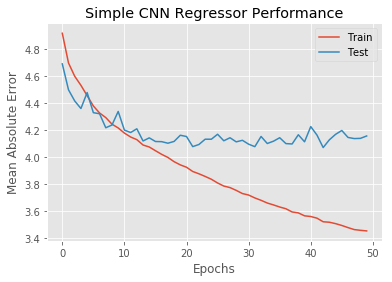

In [13]:
graph_MAE(history_age, 'Simple CNN Regressor Performance')

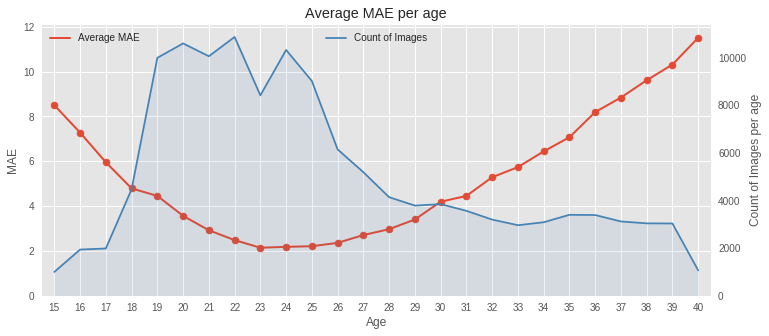

In [86]:
plot_average_MAE(train_datagen_age,validation_datagen_age, age_model)

### Regression for Male and Female Separately

#### Male model

In [100]:
imggen = ImageDataGenerator(preprocessing_function=preprocess_input, rescale=1/255.0,validation_split=0.2)

batch_size=32
filepath = '/home/ubuntu/data/AFAD-Full/AFAD_gender/male'
train_datagen_age_male = imggen.flow_from_directory(filepath, target_size=(100,100),batch_size=batch_size, 
                                           class_mode = 'sparse',subset='training')
validation_datagen_age_male = imggen.flow_from_directory(filepath, target_size=(100,100), batch_size=batch_size
                                                , class_mode = 'sparse', subset='validation')

Found 80608 images belonging to 26 classes.
Found 20137 images belonging to 26 classes.


In [64]:
age_male_model = Sequential()
age_male_model.add(Convolution2D(filters = 64, kernel_size = (3, 3), 
      padding = 'same',input_shape=(100,100,3), activation = 'relu'))
age_male_model.add(MaxPooling2D(pool_size= (2, 2)))
age_male_model.add(Convolution2D(filters = 32, kernel_size = (3, 3), 
                              padding = 'same', activation = 'relu'))
age_male_model.add(MaxPooling2D(pool_size= (2, 2)))
age_male_model.add(Dropout(0.5))
age_male_model.add(Flatten())
age_male_model.add(Dense(128, activation = 'relu'))
age_male_model.add(Dense(64, activation = 'relu'))
age_male_model.add(Dropout(0.5))
age_male_model.add(Dense(1, activation = 'linear'))

opt = keras.optimizers.Adam(learning_rate=0.0003)
age_male_model.compile(optimizer=opt, 
                  loss='mean_absolute_error', metrics=['mse'])

age_male_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 50, 50, 32)        18464     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)              

In [67]:
checkpoint = ModelCheckpoint('simple_cnn_male_age.h5', monitor = 'val_loss', 
                             mode = 'min', save_best_only = True, verbose = 1)

earlystopping = EarlyStopping(monitor= 'val_loss', patience = 5, 
                              verbose = 1, restore_best_weights= True)

history_age_male = age_male_model.fit(train_datagen_age, batch_size = 32, epochs=20, verbose=2,
                    validation_data=validation_datagen_age,callbacks=[earlystopping, checkpoint])

Epoch 1/20

Epoch 00001: val_loss improved from inf to 4.69832, saving model to age_male_weights.h5
2519/2519 - 151s - loss: 5.2269 - mean_squared_error: 44.1580 - val_loss: 4.6983 - val_mean_squared_error: 34.7524
Epoch 2/20

Epoch 00002: val_loss improved from 4.69832 to 4.61451, saving model to age_male_weights.h5
2519/2519 - 83s - loss: 5.0120 - mean_squared_error: 40.7912 - val_loss: 4.6145 - val_mean_squared_error: 33.1041
Epoch 3/20

Epoch 00003: val_loss improved from 4.61451 to 4.53759, saving model to age_male_weights.h5
2519/2519 - 82s - loss: 4.8924 - mean_squared_error: 39.1217 - val_loss: 4.5376 - val_mean_squared_error: 35.4266
Epoch 4/20

Epoch 00004: val_loss improved from 4.53759 to 4.46652, saving model to age_male_weights.h5
2519/2519 - 82s - loss: 4.8048 - mean_squared_error: 37.9724 - val_loss: 4.4665 - val_mean_squared_error: 34.0030
Epoch 5/20

Epoch 00005: val_loss improved from 4.46652 to 4.39446, saving model to age_male_weights.h5
2519/2519 - 82s - loss: 4.7

In [68]:
history_age_male2 = age_male_model.fit(train_datagen_age, batch_size = 32, epochs=20, verbose=2,
                    validation_data=validation_datagen_age,callbacks=[earlystopping, checkpoint])

Epoch 1/20

Epoch 00001: val_loss improved from 4.07515 to 4.03514, saving model to age_male_weights.h5
2519/2519 - 83s - loss: 4.1114 - mean_squared_error: 29.2370 - val_loss: 4.0351 - val_mean_squared_error: 27.8363
Epoch 2/20

Epoch 00002: val_loss did not improve from 4.03514
2519/2519 - 82s - loss: 4.0741 - mean_squared_error: 28.7438 - val_loss: 4.0449 - val_mean_squared_error: 28.0281
Epoch 3/20

Epoch 00003: val_loss did not improve from 4.03514
2519/2519 - 83s - loss: 4.0551 - mean_squared_error: 28.5378 - val_loss: 4.0419 - val_mean_squared_error: 28.4784
Epoch 4/20

Epoch 00004: val_loss improved from 4.03514 to 4.02137, saving model to age_male_weights.h5
2519/2519 - 83s - loss: 4.0222 - mean_squared_error: 28.1349 - val_loss: 4.0214 - val_mean_squared_error: 27.7967
Epoch 5/20

Epoch 00005: val_loss did not improve from 4.02137
2519/2519 - 83s - loss: 3.9969 - mean_squared_error: 27.8404 - val_loss: 4.0269 - val_mean_squared_error: 27.8209
Epoch 6/20

Epoch 00006: val_loss

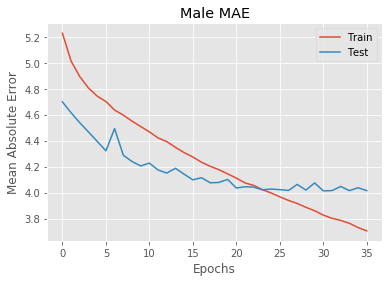

In [73]:
history_loss = history_age_male.history['loss'] + history_age_male2.history['loss']
history_val_loss = history_age_male.history['val_loss'] + history_age_male2.history['val_loss']

fig, ax = plt.subplots()
ax.set_title('Male MAE')
ax.plot(history_loss, label='Train')
ax.plot(history_val_loss, label='Test')
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.legend()

[ 356  753  908 2043 5104 5544 5568 6236 4953 6517 5919 4140 3576 2835
 2707 2732 2496 2267 2078 2016 2336 2355 2123 2171 2068  807]


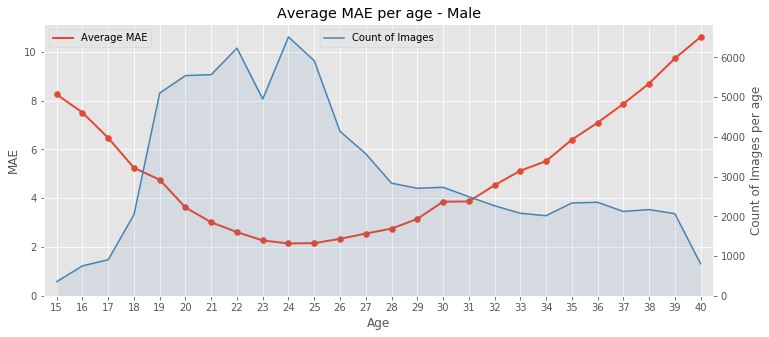

In [101]:
plot_average_MAE(train_datagen_age_male, validation_datagen_age_male, age_male_model, gender = 'M')

#### Female model 

In [74]:
imggen = ImageDataGenerator(preprocessing_function=preprocess_input, rescale=1/255.0,validation_split=0.2)

batch_size=32
filepath = '/home/ubuntu/data/AFAD-Full/AFAD_gender/female'
train_datagen_age = imggen.flow_from_directory(filepath, target_size=(100,100),batch_size=batch_size, 
                                           class_mode = 'sparse',subset='training')
validation_datagen_age = imggen.flow_from_directory(filepath, target_size=(100,100), batch_size=batch_size
                                                , class_mode = 'sparse', subset='validation')

Found 50948 images belonging to 26 classes.
Found 12725 images belonging to 26 classes.


In [75]:
age_female_model = Sequential()
age_female_model.add(Convolution2D(filters = 64, kernel_size = (3, 3), 
      padding = 'same',input_shape=(100,100,3), activation = 'relu'))
age_female_model.add(MaxPooling2D(pool_size= (2, 2)))
age_female_model.add(Convolution2D(filters = 32, kernel_size = (3, 3), 
                              padding = 'same', activation = 'relu'))
age_female_model.add(MaxPooling2D(pool_size= (2, 2)))
age_female_model.add(Dropout(0.5))
age_female_model.add(Flatten())
age_female_model.add(Dense(128, activation = 'relu'))
age_female_model.add(Dense(64, activation = 'relu'))
age_female_model.add(Dropout(0.5))
age_female_model.add(Dense(1, activation = 'linear'))

age_female_model.compile(optimizer='adam',
                  loss='mean_absolute_error', metrics=['mse'])

age_female_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 50, 50, 32)        18464     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)              

In [77]:
checkpoint = ModelCheckpoint('simple_cnn_female_age.h5', monitor = 'val_loss', 
                             mode = 'min', save_best_only = True, verbose = 1)

earlystopping = EarlyStopping(monitor= 'val_loss', patience = 5, 
                              verbose = 1, restore_best_weights= True)

history_age_female = age_female_model.fit(train_datagen_age, batch_size = 32, epochs=50, verbose=2,
                    validation_data=validation_datagen_age,callbacks=[earlystopping, checkpoint])

Epoch 1/50

Epoch 00001: val_loss improved from inf to 4.22245, saving model to age_female_weights.h5
1593/1593 - 120s - loss: 4.7461 - mean_squared_error: 40.6088 - val_loss: 4.2224 - val_mean_squared_error: 32.7766
Epoch 2/50

Epoch 00002: val_loss did not improve from 4.22245
1593/1593 - 67s - loss: 4.5528 - mean_squared_error: 37.3474 - val_loss: 4.2260 - val_mean_squared_error: 31.1737
Epoch 3/50

Epoch 00003: val_loss improved from 4.22245 to 4.11085, saving model to age_female_weights.h5
1593/1593 - 67s - loss: 4.4647 - mean_squared_error: 36.0069 - val_loss: 4.1109 - val_mean_squared_error: 32.3000
Epoch 4/50

Epoch 00004: val_loss improved from 4.11085 to 4.10152, saving model to age_female_weights.h5
1593/1593 - 67s - loss: 4.3828 - mean_squared_error: 34.8664 - val_loss: 4.1015 - val_mean_squared_error: 33.9244
Epoch 5/50

Epoch 00005: val_loss improved from 4.10152 to 4.03362, saving model to age_female_weights.h5
1593/1593 - 67s - loss: 4.3153 - mean_squared_error: 34.0082

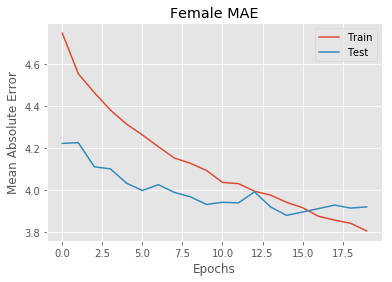

In [79]:
graph_MAE(history_age_female, 'Female MAE')

[ 645 1186 1078 2426 4879 5042 4480 4623 3456 3796 3091 2002 1610 1302
 1078 1113 1070  931  884 1070 1062 1033  996  868  965  262]


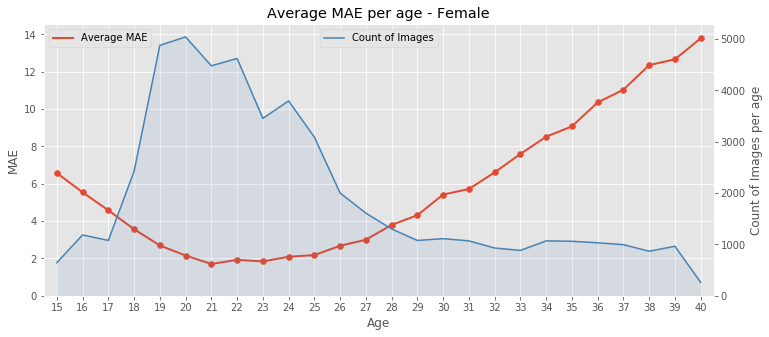

In [99]:
plot_average_MAE(train_datagen_age, validation_datagen_age, age_female_model, gender = 'F')

#### Male Female Average MAE

In [110]:
true_pred_df_male = get_ytrue_ypred(age_male_model,validation_datagen_age_male)[2]
true_pred_df_female = get_ytrue_ypred(age_female_model,validation_datagen_age)[2]

mae_female = get_average_MAE(true_pred_df=true_pred_df_female)
mae_male = get_average_MAE(true_pred_df=true_pred_df_male)

Text(0.5, 1.0, 'Average MAE - Male vs Female')

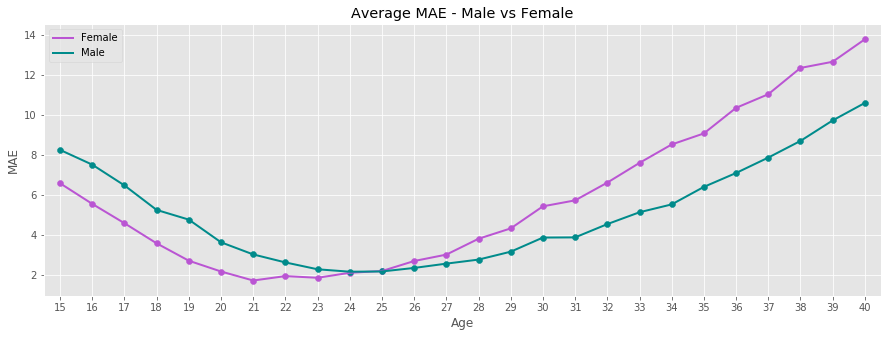

In [128]:
fig, ax = plt.subplots(figsize = (15,5))
ages = np.arange(15,41)
ax.plot(ages, mae_female, color = 'mediumorchid',linewidth = 2,label = 'Female')
ax.scatter(ages, mae_female,c='mediumorchid')
ax.plot(ages, mae_male,color ='darkcyan' ,linewidth = 2,label = 'Male')
ax.scatter(ages, mae_male,c='darkcyan')
ax.set_xticks(ages)
ax.legend()
ax.set_xlim(left = 14.5, right = 40.5)
ax.set_xlabel('Age')
ax.set_ylabel('MAE')
ax.set_title('Average MAE - Male vs Female')

### Classification

Attempted classification. But the results was not good. 

In [49]:
imggen = ImageDataGenerator(preprocessing_function=preprocess_input, rescale=1/255.0,validation_split=0.2)

batch_size=32
filepath = '/home/ubuntu/data/AFAD-Full/age_4clf'
train_datagen_age = imggen.flow_from_directory(filepath, target_size=(100,100),batch_size=batch_size, 
                                           class_mode = 'sparse', subset='training',seed =1)
validation_datagen_age = imggen.flow_from_directory(filepath, target_size=(100,100), batch_size=batch_size,
                                             class_mode = 'sparse'  , subset='validation',seed =1)

Found 131536 images belonging to 4 classes.
Found 32882 images belonging to 4 classes.


In [50]:
train_datagen_age1 = imggen.flow_from_directory(filepath, target_size=(100,100),batch_size=batch_size, 
                                            subset='training',seed =1)
validation_datagen_age1 = imggen.flow_from_directory(filepath, target_size=(100,100), batch_size=batch_size,
                                              subset='validation',seed =1)

Found 131536 images belonging to 4 classes.
Found 32882 images belonging to 4 classes.


In [54]:
age_model = Sequential()
age_model.add(Convolution2D(filters = 64, kernel_size = (3, 3), 
      padding = 'same',input_shape=(100,100,3), activation = 'relu'))
age_model.add(MaxPooling2D(pool_size= (2, 2)))
age_model.add(Convolution2D(filters = 32, kernel_size = (3, 3), 
                              padding = 'same', activation = 'relu'))
age_model.add(MaxPooling2D(pool_size= (2, 2)))
age_model.add(Dropout(0.5))
age_model.add(Flatten())
age_model.add(Dense(128, activation = 'relu'))
age_model.add(Dense(64, activation = 'relu'))
age_model.add(Dropout(0.5))
age_model.add(Dense(4, activation = 'softmax'))

age_model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', metrics=['accuracy'])

age_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 50, 50, 32)        18464     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)              

In [55]:
checkpoint = ModelCheckpoint('age_clf4_weights.h5', monitor = 'val_loss', 
                             mode = 'min', save_best_only = True, verbose = 1)

earlystopping = EarlyStopping(monitor= 'val_loss', patience = 3, 
                              verbose = 1, restore_best_weights= True)

In [57]:
y_train = np.array([])

for i in range(len(train_datagen_age)):
    y_train = np.append(y_train, train_datagen_age[i][1])

In [58]:
class4_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

In [59]:
class4_weights

array([0.97596011, 0.67612468, 1.70861478, 1.0975968 ])

In [61]:
np.unique(y_train, return_counts=True)

(array([0., 1., 2., 3.]), array([33694, 48636, 19246, 29960]))

In [62]:
# Manually stopped the training as the model seemed to be stuck at a local minimum
history_age_clf4 = age_model.fit(train_datagen_age1, batch_size = 32, epochs=10, verbose=2,
                                    class_weight=class4_weights,
                    validation_data=validation_datagen_age1,callbacks=[earlystopping, checkpoint])

Epoch 1/10

Epoch 00001: val_loss did not improve from 1.33500
4111/4111 - 148s - loss: 1.3352 - acc: 0.3698 - val_loss: 1.3350 - val_acc: 0.3697
Epoch 2/10

Epoch 00002: val_loss did not improve from 1.33500
4111/4111 - 148s - loss: 1.3350 - acc: 0.3698 - val_loss: 1.3350 - val_acc: 0.3697
Epoch 3/10

Epoch 00003: val_loss did not improve from 1.33500
4111/4111 - 148s - loss: 1.3350 - acc: 0.3698 - val_loss: 1.3351 - val_acc: 0.3697
Epoch 4/10


KeyboardInterrupt: 